Car Sales Analysis

Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Car Sales Data form CSV File

In [20]:
file = "C:/Users/media/OneDrive/Escriptori/Analyse/Car_sales.csv"
car_data = pd.read_csv(file)

car_data.head(5)

  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

Data Exploration!
Which are the best-selling car brands? And the models?

In [7]:
# Filter to remove rows with null values in 'Sales_in_thousands'.

Sales_clean = car_data.dropna(subset=['Sales_in_thousands'])

#Sales by manufacturer

sales_by_manufacturers = Sales_clean.groupby('Manufacturer')['Sales_in_thousands'].sum().sort_values(ascending=False)
top_10_manufacturers = sales_by_manufacturers.head(10)
print(top_10_manufacturers)

Manufacturer
Ford         2022.635
Dodge         910.149
Toyota        740.205
Honda         592.674
Chevrolet     554.365
Nissan        399.635
Pontiac       370.534
Jeep          293.153
Buick         242.019
Mercury       237.999
Name: Sales_in_thousands, dtype: float64


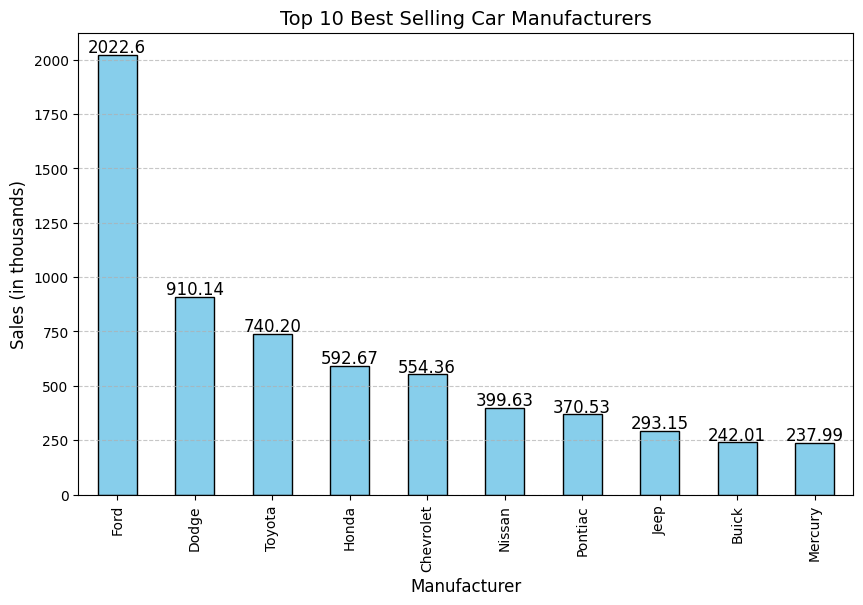

In [ ]:
# Visualization of sales data by manufacturer

bar_10_manufacturers = top_10_manufacturers.plot(kind='bar', figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Top 10 Best Selling Car Manufacturers', fontsize=14)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Sales (in thousands)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(top_10_manufacturers):
    bar_10_manufacturers.text(i, v + 10, str(v)[:6], ha='center', fontsize=12)
plt.show()


In [11]:
#Sales by model

sales_by_model = Sales_clean.groupby(['Model', 'Manufacturer', 'Price_in_thousands'])['Sales_in_thousands'].sum().sort_values(ascending=False)
top_10_models = sales_by_model.head(10)
print(top_10_models)


Model       Manufacturer  Price_in_thousands
F-Series    Ford          26.935                540.561
Explorer    Ford          31.930                276.747
Camry       Toyota        17.518                247.994
Taurus      Ford          17.885                245.815
Accord      Honda         15.350                230.902
Ram Pickup  Dodge         19.460                227.061
Ranger      Ford          12.050                220.650
Civic       Honda         12.885                199.685
Caravan     Dodge         19.565                181.749
Focus       Ford          12.315                175.670
Name: Sales_in_thousands, dtype: float64


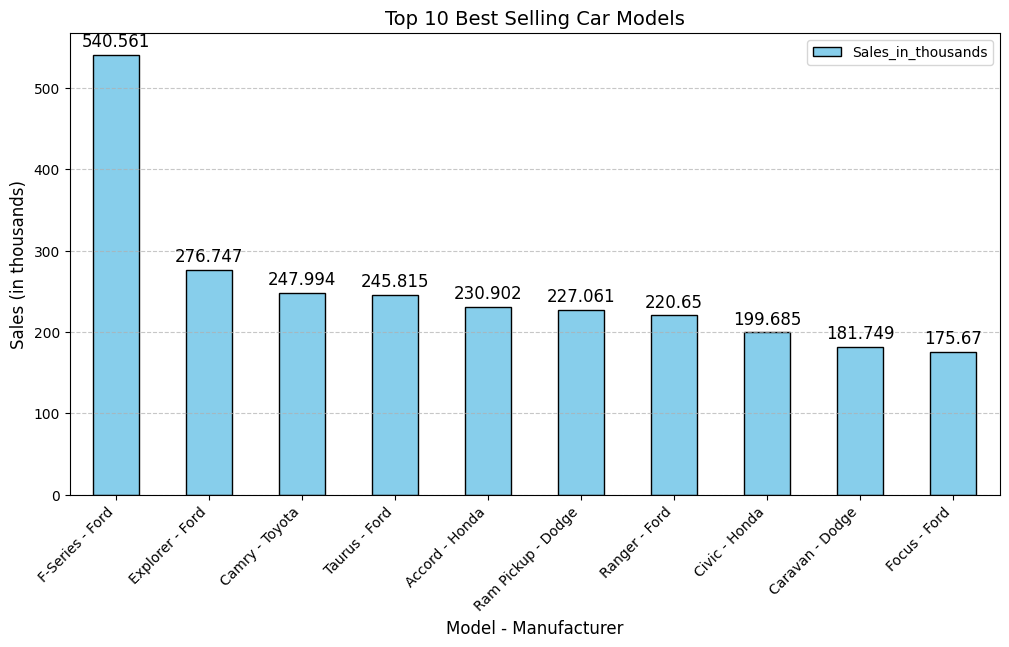

In [14]:
# Visualization of sales data by model

top_10_models = top_10_models.reset_index()
top_10_models['Model_and_Manufacturer'] = top_10_models['Model'] + ' - ' + top_10_models['Manufacturer']

bar_10_models = top_10_models.plot(kind='bar', x='Model_and_Manufacturer', y='Sales_in_thousands', figsize=(12,6), color='skyblue', edgecolor='black')
plt.title('Top 10 Best Selling Car Models', fontsize=14)
plt.xlabel('Model - Manufacturer', fontsize=12)
plt.ylabel('Sales (in thousands)', fontsize=12)
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(top_10_models['Sales_in_thousands']):
    bar_10_models.text(i, v + 10, str(v), ha='center', fontsize=12)
plt.show()

How has the price distribution been? Are there very expensive or very cheap cars?

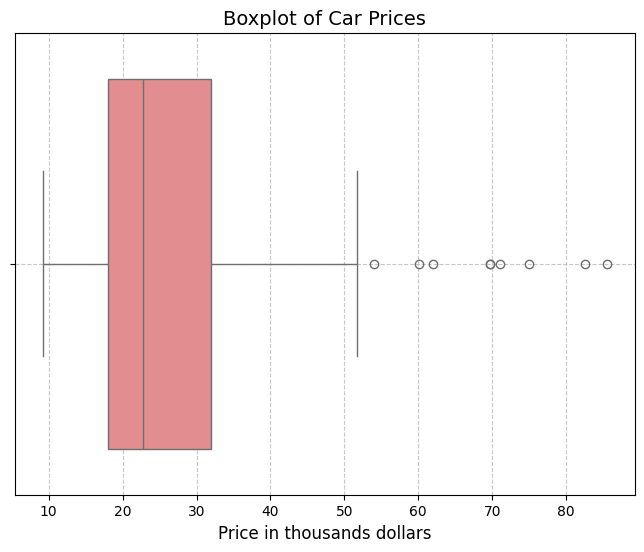

In [15]:
# Filter to remove rows with null values in 'Price_in_thousands'.
prices_clean = car_data.dropna(subset=['Price_in_thousands'])

#With a Boxplot we can see the prices and possible outliers.
plt.figure(figsize=(8,6))
sns.boxplot(x=Sales_clean['Price_in_thousands'], color='lightcoral')
plt.title('Boxplot of Car Prices', fontsize=14)
plt.xlabel('Price in thousands dollars', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

We see that most of the cars are priced between 20 and 30 k and other prices not so abundant but frequent are between 10 and 50k. 
However we see two values out of the ordinary, which exceed 80k, let's analyze them:

In [17]:
high_price_cars = prices_clean[prices_clean['Price_in_thousands'] > 80]
Sales_clean_sorted = Sales_clean.sort_values(by='Sales_in_thousands', ascending=False)
Sales_clean_sorted['Rank'] = range(1, len(Sales_clean_sorted) + 1)
high_price_cars = high_price_cars.merge(Sales_clean_sorted[['Manufacturer', 'Model', 'Price_in_thousands', 'Rank']],
                                         on=['Manufacturer', 'Model', 'Price_in_thousands'])
high_price_cars['Total_Data_Cars']= len(Sales_clean)
print(high_price_cars[['Manufacturer', 'Model', 'Price_in_thousands','Sales_in_thousands' ,'Rank', 'Total_Data_Cars']])

  Manufacturer     Model  Price_in_thousands  Sales_in_thousands  Rank  \
0   Mercedes-B  SL-Class                82.6               3.311   148   
1   Mercedes-B     CL500                85.5               0.954   155   

   Total_Data_Cars  
0              157  
1              157  


We see that they are in position 148 and 155, and with 157 models, they are in a very low position, so that these high prices, despite their high price, the number of sales is not a positive point for these two models. 

Is there a relationship between the price of the car and its sales?

Correlation between price and sales: -0.3047344541294122


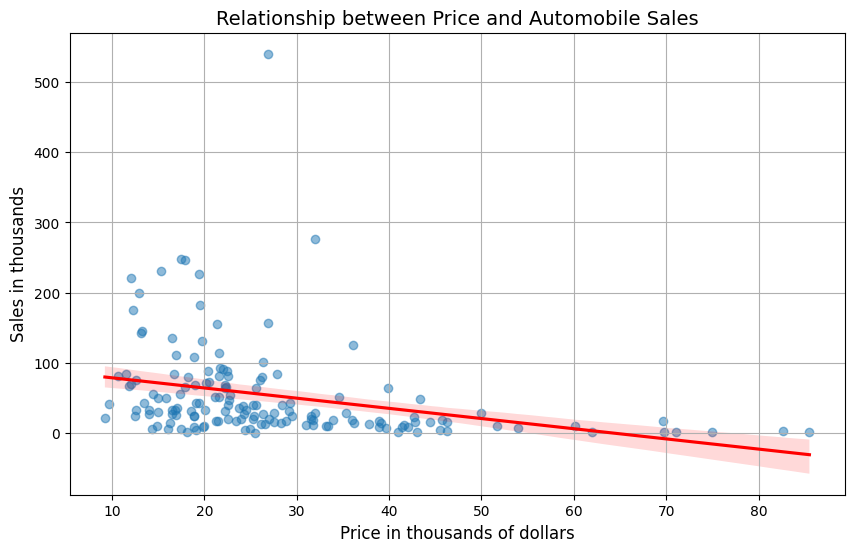

In [19]:
# Calculate the correlation between price and sales
correlation = Sales_clean['Price_in_thousands'].corr(Sales_clean['Sales_in_thousands'])
print("Correlation between price and sales:", correlation)

# Scatter plot between Price and Sales with a trend line
plt.figure(figsize=(10,6))
sns.regplot(x=Sales_clean['Price_in_thousands'], y=Sales_clean['Sales_in_thousands'], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Relationship between Price and Automobile Sales', fontsize=14)
plt.xlabel('Price in thousands of dollars', fontsize=12)
plt.ylabel('Sales in thousands', fontsize=12)
plt.grid(True)
plt.show()

With the graph we can see how it is true that the number of sales is centered between 20 and 40k but that the relationship that as the price rises sales does not decrease, is true but not very strong, as there is a price of 70k that has more sales than the 40k over 10k and 70k to 60k.